<footer id="footer"></footer>

<p align="center"><img src='https://i.ibb.co/wKyYNpt/slider.jpg'></p>

**Телеком: исследование оттока клиентов**   


Нам необходимо проработать способы удержания клиентов

Перед нами поставили следующие задачи:

- сравнить распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. 

- для каждой группы посчитать статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. Построить гистограммы распредления  

Сравнить поведение клиентов этих двух групп. Для каждой построить графики, изображающие:  

- долю пользователей телефонной связи;  
- долю интернет-пользователей.




---
<font size="2">
Примечание

*Чтобы не спойлерить предобработку - я залил сюда обработанный в основной работе сет*
</font>     


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

In [ ]:
%%capture
!gdown --id 1hmKiTEffiYOhgg_HI3F2AmegCfEtFtVi

In [ ]:
%%capture
!gdown --id 1f6D0-zvQOqmwMCQSF8fqwRtmfXchND9E
!unzip /content/final_provider.zip

## Загрузка данных и первичный осмотр

### Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np 
import pylab
import scipy.stats as stats
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")
np.random.seed(42)

In [ ]:
def qq_plt(data):
  plt.figure(figsize=(10,5))
  measurements = data
  stats.probplot(measurements, dist="norm", plot=pylab)
  plt.title('QQ-график')
  plt.xlabel('Теоретические квантили')
  plt.ylabel('Упорядоченые значения')
  pylab.show()

def kde_plot(data, col):
  plt.figure(figsize=(10,5))
  sns.kdeplot(data=data, shade=True, 
                 alpha=.5, linewidth=4.2
  )
  plt.xlabel(f"{col}")
  plt.title('KDE оценка плотности')
  plt.show()

def boxplot(data, col):

    plt.figure(figsize=(5,5))
    sns.boxplot(data=data[col], linewidth=0.42, palette="Set2")
    plt.title('Диаграмма размаха ' + f'{col}')

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

### Общий анализ данных

In [ ]:
df = pd.read_csv('/content/diploma_prepared.csv')

In [ ]:
df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,label,total_month
0,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No,0,1
1,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,0,34
2,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,1,2
3,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,No,0,45
4,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No,1,2


Перед нами уже предобработанный сет, исследовать необходимо несколько признаков:  

- `monthly_charges` - месячная оплата  
- `total_charges` - всего оплачено  
- `label` - признак ушел клиент или еще пользуется услугами. Опорный в данном случае


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   internet_service   7043 non-null   object 
 6   online_security    7043 non-null   object 
 7   online_backup      7043 non-null   object 
 8   device_protection  7043 non-null   object 
 9   tech_support       7043 non-null   object 
 10  streaming_tv       7043 non-null   object 
 11  streaming_movies   7043 non-null   object 
 12  gender             7043 non-null   object 
 13  senior_citizen     7043 non-null   int64  
 14  partner            7043 non-null   object 
 15  dependents         7043 non-null   object 
 16  multiple_lines     7043 

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

Пропусков нет, типы данных были изменены на float64 и int64 для удобства анализа

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
label,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
total_month,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00


- `total_charges` положительно направленную ассиметрию, скошен направо, 
значение среднего больше, чем медиана , распределение унимодальное

- `monthly_charges` имеет отрицательную направленость, является бимодальным, скошен влево - медиана больше среднего


попробуем подтвердить наши слова визуализацией. Для начала посмотрим гистограммы

In [ ]:
cols = ['monthly_charges', 'total_charges']

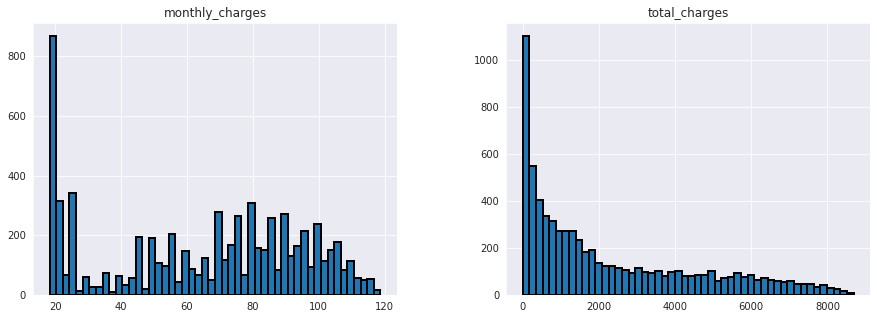

In [ ]:
df[cols].hist(bins=50, figsize=(15,5), ec='black', linewidth=2)
plt.show()

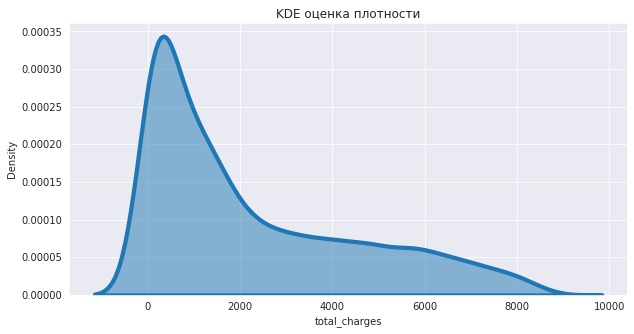

In [ ]:
kde_plot(df['total_charges'], 'total_charges')

Ядерная оценка нашего распределния лучше отражает природу данных - наше предположение подтверждается. Мы можем также проверить, нормальное распределение у нас или нет используя квантиль-квантиль график:

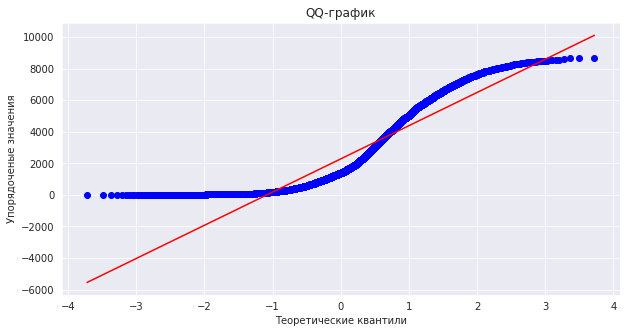

In [ ]:
qq_plt(df['total_charges'])

Аналогично сделаем по признаку `monthly_charges`

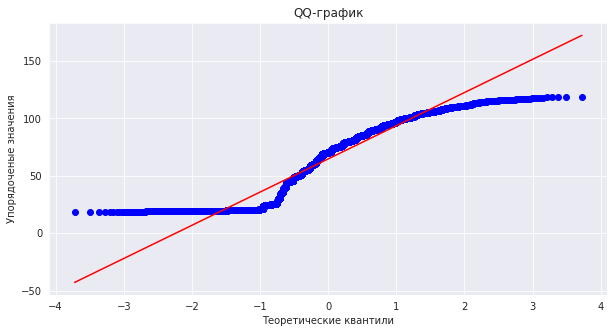

In [ ]:
qq_plt(df['monthly_charges'])

Квантиль-квантильный график показывает, что данные не распределены нормально, это также было видно по гистограмме

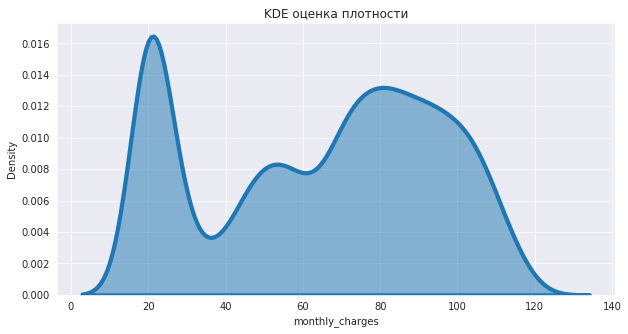

In [ ]:
kde_plot(df['monthly_charges'], 'monthly_charges')

а вот Kde оценка не дает явного представления нам о направлении скошенности наших данных

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

Если обратиться к ключевым харктеристикам распредления и взять среднее - то у двух выборок они не равны - клиенты, которые покинули фирму - платили в среднем в месяц больше

In [ ]:
df_churn[['monthly_charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.2,118.35


In [ ]:
df_clients[['monthly_charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,5174.0,61.265124,31.092648,18.25,25.1,64.425,88.4,118.75


In [ ]:
df.groupby('label')['monthly_charges'].agg('mean')

label
0    61.265124
1    74.441332
Name: monthly_charges, dtype: float64

KDE оценка для ушедших клиентов


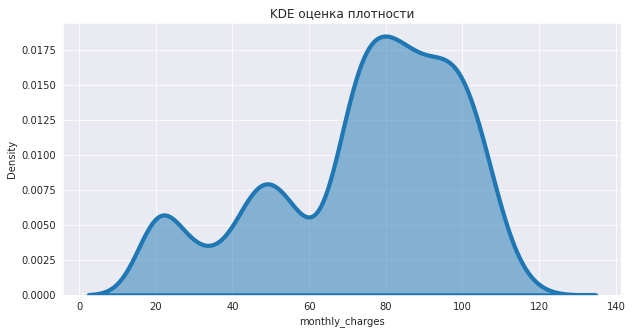

In [ ]:
print('KDE оценка для ушедших клиентов')
kde_plot(df_churn['monthly_charges'], 'monthly_charges')


Если обратиться к kde оценке плотности, то мы увидим, что у двух выборок различная природа распределений - отчетливо видно, что клиенты неудовлетворенность услугами фирмы зачастую у тех, кто платит больше

Для текущих клиентов


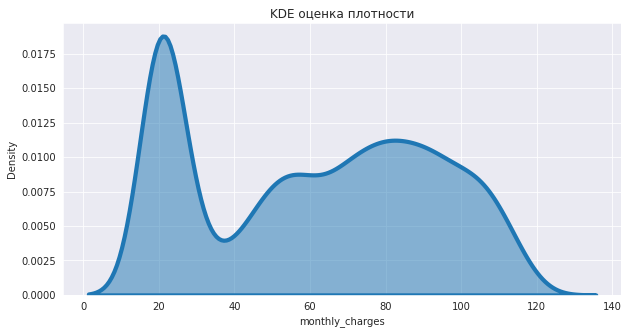

In [ ]:
print('Для текущих клиентов')
kde_plot(df_clients['monthly_charges'], 'monthly_charges')

Также посмотрим QQ графики наших распредлений

QQ для ушедших клиентов


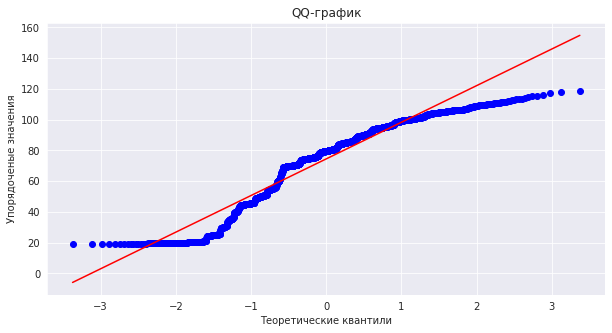

In [ ]:
print('QQ для ушедших клиентов')
qq_plt(df_churn['monthly_charges'])

Для текущих клиентов


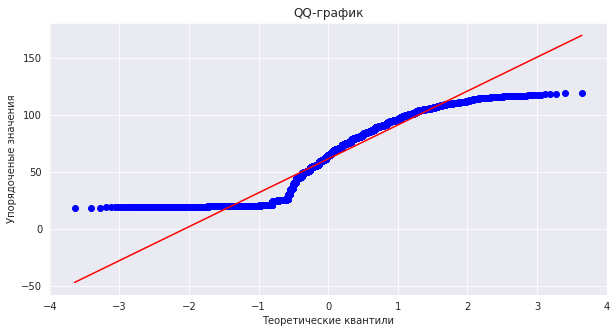

In [ ]:
print('Для текущих клиентов')
qq_plt(df_clients['monthly_charges'])

Природа не изменилась - данные не распределены нормально

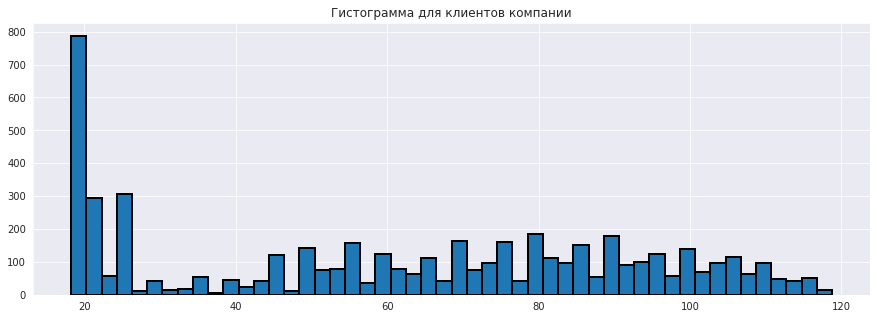

In [ ]:
df_clients['monthly_charges'].hist(bins=50, figsize=(15,5), ec='black', linewidth=2)
plt.title('Гистограмма для клиентов компании')
plt.show()

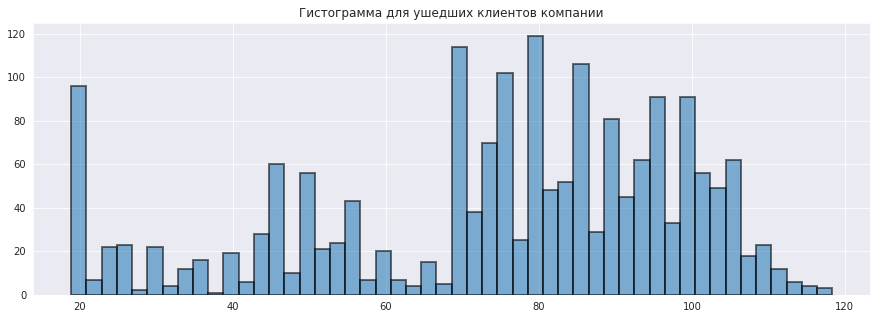

In [ ]:
df_churn['monthly_charges'].hist(bins=50, figsize=(15,5), 
                                 ec='black', linewidth=2, alpha=.55)
plt.title('Гистограмма для ушедших клиентов компании')
plt.show()

Опять же, обратим внимание на то, что клиенты, которые ушли - платят больше в месяц, чем те, кто еще остаются пользоваться услугами  

Добавим новый признак `income_cat` по ежемесячной оплате

In [ ]:
df['income_cat'] = pd.cut(df['monthly_charges'],
                               bins=[0., 20., 40., 60., 80., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
df['income_cat'].value_counts(normalize=True).to_frame()

,income_cat
5,0.378532
4,0.207156
2,0.167826
3,0.153344
1,0.093142


In [ ]:
(df.groupby('income_cat')['label'].agg(['sum', 'count'])
.assign(ratio = lambda x: x['sum'] / x['count'])
).sort_values(by='ratio', ascending=False).style.background_gradient(low=0.42)

,sum,count,ratio
income_cat,,,
5,906,2666,0.339835
4,473,1459,0.324195
3,276,1080,0.255556
2,156,1182,0.131980
1,58,656,0.088415


Чем больше пользователи платят в месяц - тем выше вероятность ухода - мы в очередной раз смогли это подтвердить

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

Изобразим пользователей следующих категорий по рассмотренным группам:  

- долю пользователей телефонной связи;  
- долю интернет-пользователей.  

Из-за особенностей предобработки, нам придется загрузить начальный сет и добавить дополнительный признак - `phone_type`

In [ ]:
contract = pd.read_csv('/content/final_provider/contract.csv', index_col='customerID')
internet = pd.read_csv('/content/final_provider/internet.csv', index_col='customerID')
phone = pd.read_csv('/content/final_provider/phone.csv', index_col='customerID')

In [ ]:
support = contract.join([internet, phone])

In [ ]:
support.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No


In [ ]:
support['phone_type'] = (support['MultipleLines']
                        .apply(lambda x: 'one_line' if x=='No' 
                               else ('Multiple' if x=='Yes' else 'None'))
                        )
support = support.drop('MultipleLines', axis=1)

In [ ]:
phone_users = support[['phone_type']].reset_index(drop=True)

Получили признак `phone_type` - значения `one_line` - для одной линии и `Multiple` - для нескольких

In [ ]:
phone_users.head()

,phone_type
0,None
1,one_line
2,one_line
3,None
4,one_line


Присоедим его к начальному сету данных

In [ ]:
df = df.join(phone_users)
df.drop('multiple_lines', axis=1, inplace=True)

Теперь мы можем добавить группировки по типу пользователя - только интернет, интернет и телефония, телефония. Также добавим тип - неизвестный

In [ ]:
def user_group (data):
  internet = data['internet_service']
  phone = data['phone_type']
  if (internet == 'DSL' or internet == 'Fiber optic') and (phone=='one_line' or phone=='Multiple'):
      return 'Интернет и телефония'
  elif internet == 'DSL' or internet == 'Fiber optic':
      return 'Интернет'
  elif phone == 'one_line' or phone == 'Multiple':
      return 'Телефония'
  else:
      return 'Неизвестный тип'

In [ ]:
df['user_group'] = df.apply(user_group, axis=1)

Подготовили все к заключительному анализу - теперь мы можем построить графики долей пользователей

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

### Графики долей пользователей

У нас немного категорий - отобразим доли с помощью круговой диаграммы. 

In [ ]:
users = pd.DataFrame(df['user_group'].value_counts(normalize=True))
users.columns = ['Все пользователи']
users['Отток'] = df[df['label'] == 1]['user_group'].value_counts(normalize=True)

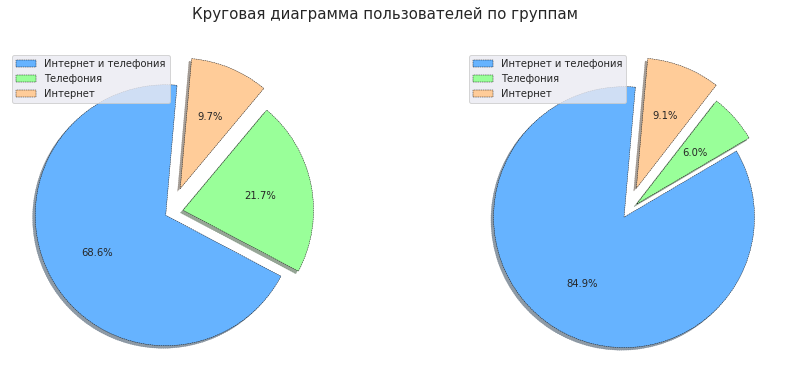

In [ ]:
colors = ['#66b3ff','#99ff99','#ffcc99']
f, axes = plt.subplots(1,2, figsize=(15, 6))
for ax, col in zip(axes, users.columns):
    patches, text, _ = ax.pie(users[col].values, autopct='%1.1f%%',
                               wedgeprops={'edgecolor':'black','linewidth': .42, 
                              'linestyle': '--', 'antialiased': True}, shadow=True,
                              rotatelabels=False, explode = (.04, 0.1, 0.2),
                              startangle=85, labeldistance=.09, colors=colors)
    ax.legend(patches, labels=users.index, loc='best')

f.suptitle('Круговая диаграмма пользователей по группам', fontsize=15)
plt.show()

Общая доля пользователей, продолжающих сотрудничество и использующих интернет - 68.6%, при этом в оттоке эта доля составляет 84.9%. Доля пользователей оттока, которые пользуются телефоном составляет 6% против 21.7% продолжающих сотрудничество

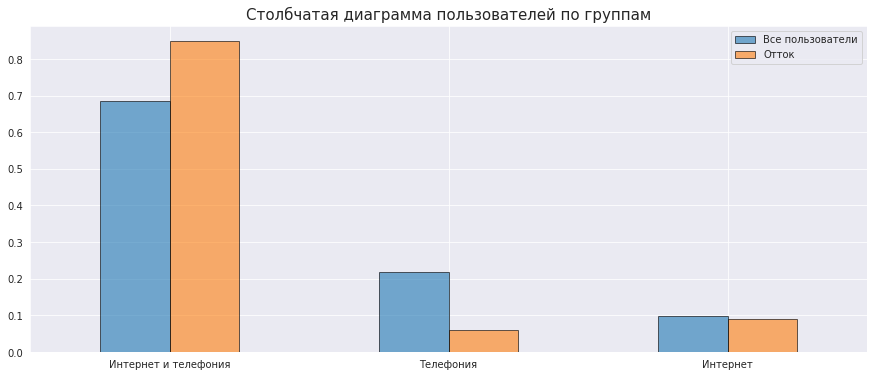

In [ ]:
users.plot(kind='bar', figsize=(15, 6), ec='black',
           alpha=.6)
plt.title('Столбчатая диаграмма пользователей по группам', 
          fontsize=15)
plt.xticks(rotation=360)
plt.show()

Большая часть клиентов, пользуется и телефоном, и интернетом - основная доля оттока приходится на данный тип клиента. 

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___

### Вывод

Необходимо было провести исследования по изучению распредления ежемесячных величин всех клиентов и тех кто ушел. В результате анализа было выявлно:  

- уходят те, кто платит в месяц больше 
- уходят те, кто использует и телефонию, и интернет


Необходимо обратить внимание на пользователей, что используют оба типа услуг одновременно и предложить им пакетные решения, которые позволят снизить ежемесячные затраты, предлагать долгосрочные контракты за дополнительные бонусы в виде услуг компании

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

___